# Problem Statement

In [1]:
# A retail store that has multiple outlets across the country are facing issues in managing the
# inventory - to match the demand with respect to supply.

In [2]:
# 1. You are provided with the weekly sales data for their various outlets. Use statistical
# analysis, EDA, outlier analysis, and handle the missing values to come up with various
# insights that can give them a clear perspective on the following:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?
# b. If the weekly sales show a seasonal trend, when and what could be the reason?
# c. Does temperature affect the weekly sales in any manner?
# d. How is the Consumer Price index affecting the weekly sales of various stores?
# e. Top performing stores according to the historical data.
# f. The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12
# weeks

In [3]:
# First we have loaded some few of the liberies so we can begin with our objective

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Then we have loaded the detaset as data

In [6]:
data = pd.read_csv('Walmart DataSet.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
# now, we want to know all columns types, data types and total number of columns and rows

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
# in this code we are renaming the columns so we have some easiyness while performing the coding

In [10]:
data.rename(columns = {'Store':'store',
                      'Weekly_Sales':'weekly_sales',
                      'Holiday_Flag':'holiday_flag',
                      'Temperature':'temperature',
                      'Fuel_Price':'fule_price',
                      'CPI':'cpi',
                      'Unemployment':'unemployment'},inplace = True)

In [11]:
data

,store,Date,weekly_sales,holiday_flag,temperature,fule_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [12]:
# In this code, we are converting the data type of the 'date' column into a datetime format. We are performing this conversion to prevent potential errors in subsequent steps and to ensure that all columns have appropriate data types.

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_11428\1453708669.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fule_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
data

,store,Date,weekly_sales,holiday_flag,temperature,fule_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [16]:
# Next, we will conduct Exploratory Data Analysis (EDA). During EDA, our focus will be on identifying and handling null values and duplicated records. This proactive step aims to prevent any potential issues that could hinder our progress in addressing our problem statement

# EDA

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fule_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [18]:
# In this step, we are examining the dataset for any null values. If we had encountered any null values, our approach would have been to remove them. However, as of now, we have confirmed that there are no null values, so we can proceed with the analysis

In [19]:
data.isnull().sum()

store           0
Date            0
weekly_sales    0
holiday_flag    0
temperature     0
fule_price      0
cpi             0
unemployment    0
dtype: int64

In [20]:
# Here, we are verifying the dataset for duplicated values. If any duplicates were found, our plan would have been to eliminate them. However, in the current scenario, we have confirmed the absence of duplicated records, allowing us to proceed with our analysis.

In [21]:
data.duplicated().sum()

0

In [22]:
# We will now proceed with our outlier analysis. Outlier analysis, also known as outlier detection or anomaly detection, is a data analysis technique employed to pinpoint data points or observations that significantly deviate from the majority of the dataset. These exceptional data points, known as outliers or anomalies, may signify errors, rare occurrences, or unusual patterns within the data.

# The presence of outliers can skew statistical analyses and impede the performance of machine learning models, potentially leading to inaccurate conclusions. Therefore, identifying and managing outliers is a critical step in data preprocessing and analysis.

# By removing outliers, we ensure that our dataset does not contain disruptive data points that could potentially distort our forecasting efforts.

In [23]:
# Outlier Analysis

In [24]:
# we are putting all the columns within the col

In [25]:
col = data.columns

In [26]:
col

Index(['store', 'Date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fule_price', 'cpi', 'unemployment'],
      dtype='object')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fule_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [28]:
# We are now establishing a loop to generate box plots. Box plots serve as a valuable tool for identifying outliers within specific columns of our dataset. These plots aid in visualizing the distribution and potential presence of outliers within each column.

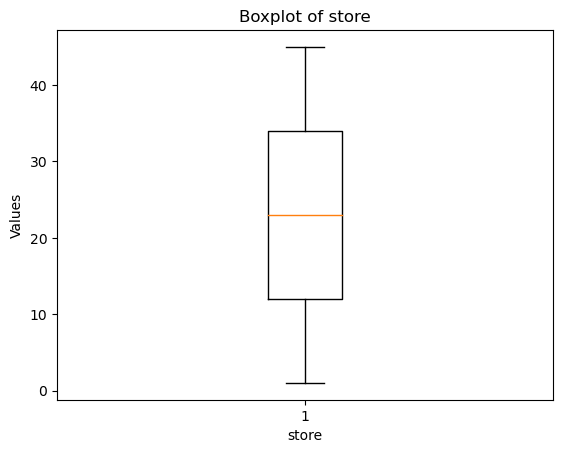

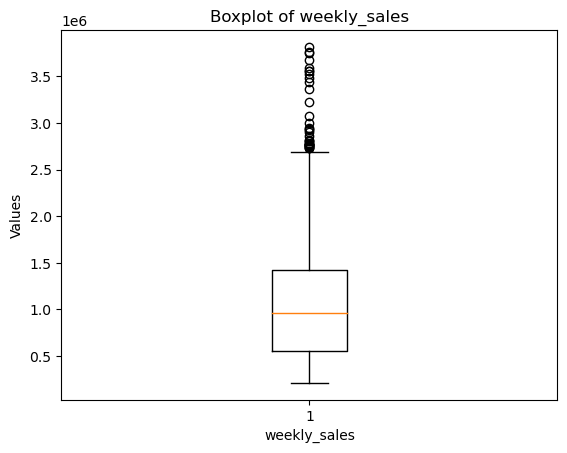

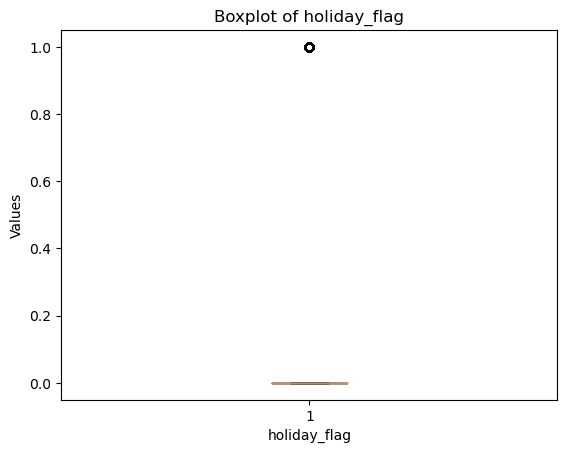

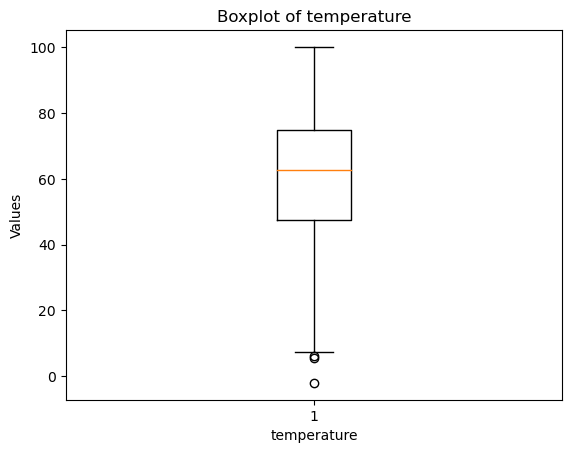

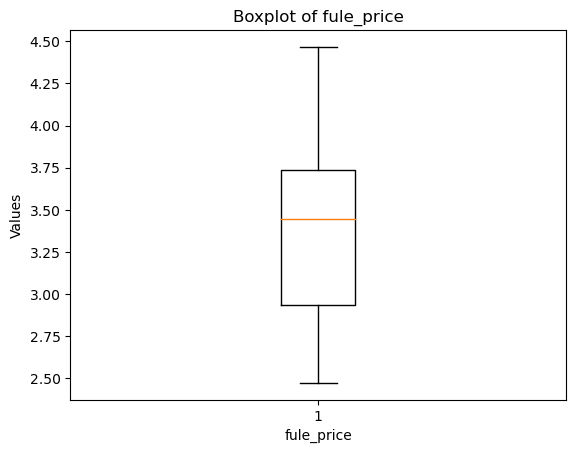

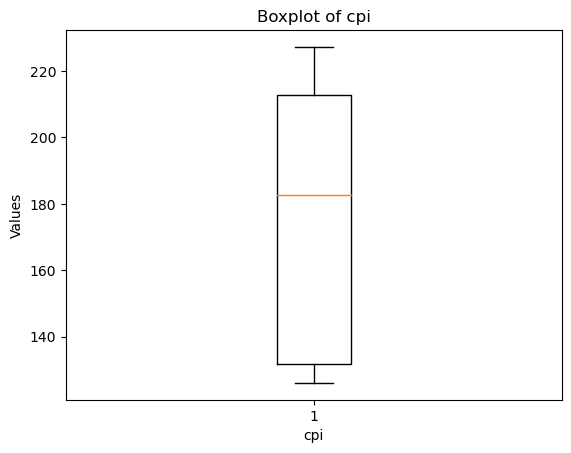

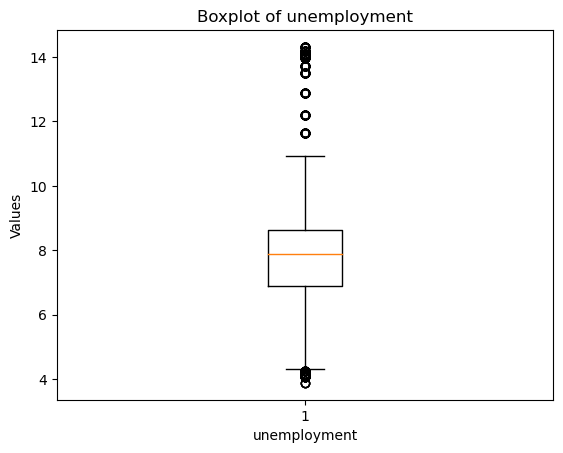

In [29]:
for i in col:
    if (data[i].dtype != 'object') and (i != 'Date'):
        plt.boxplot(data[i])
        plt.xlabel(i)  # Use 'i' directly as the label
        plt.ylabel('Values')
        plt.title(f'Boxplot of {i}')
        plt.show()

In [30]:
# Building upon the previous code, we have identified the columns in which outliers are present. Now, we will create a dedicated outlier column and include the 'weekly_sales,' 'temperature,' and 'unemployment' columns within it.

In [31]:
outlier_col = data[['weekly_sales','temperature','unemployment']]
outlier_col

,weekly_sales,temperature,unemployment
0,1643690.90,42.31,8.106
1,1641957.44,38.51,8.106
2,1611968.17,39.93,8.106
3,1409727.59,46.63,8.106
4,1554806.68,46.50,8.106
...,...,...,...
6430,713173.95,64.88,8.684
6431,733455.07,64.89,8.667
6432,734464.36,54.47,8.667
6433,718125.53,56.47,8.667


In [32]:
# The provided code appears to be a loop that iterates through a list of columns (outlier_col) in a DataFrame data and removes outliers from each of these columns using the IQR (Interquartile Range) method. 

# for i in outlier_col:

# This loop iterates through each column (referred to as i) in the list outlier_col.

# q1 = data[i].quantile(0.25)
# q3 = data[i].quantile(0.75)
# iqr = q3 - q1

# For each column i, this code calculates the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR) using the quantile method.
# q1 represents the 25th percentile, q3 represents the 75th percentile, and iqr is the difference between Q3 and Q1, which measures the spread of the middle 50% of the data.

# ll = q1 - 1.5 * iqr
# ul = q3 + 1.5 * iqr

# Lower Limit (ll) is calculated as Q1 minus 1.5 times the IQR.
# Upper Limit (ul) is calculated as Q3 plus 1.5 times the IQR.

# data = data[(data[i] < ul) & (data[i] > ll)]

# This code filters the data DataFrame to keep only the rows where the values in column i are within the range defined by the lower limit (ll) and the upper limit (ul).
# Rows that fall outside this range are removed from the DataFrame, effectively removing the outliers.

In [33]:
for i in outlier_col:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    ll = q1 - 1.5*iqr
    ul = q3+1.5*iqr
    data = data[(data[i]<ul) & (data[i]>ll)]

In [34]:
# now we are rechecking if there any outlier left or not 

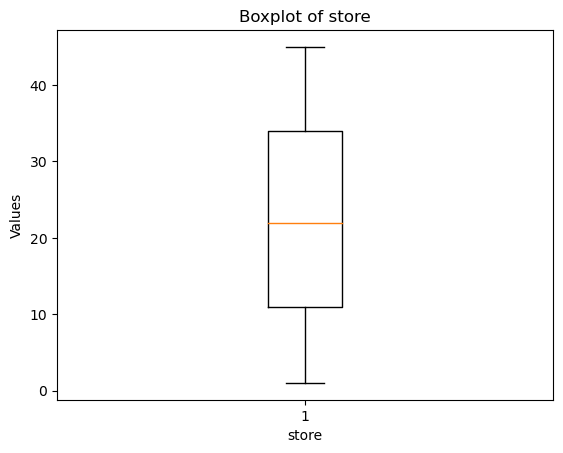

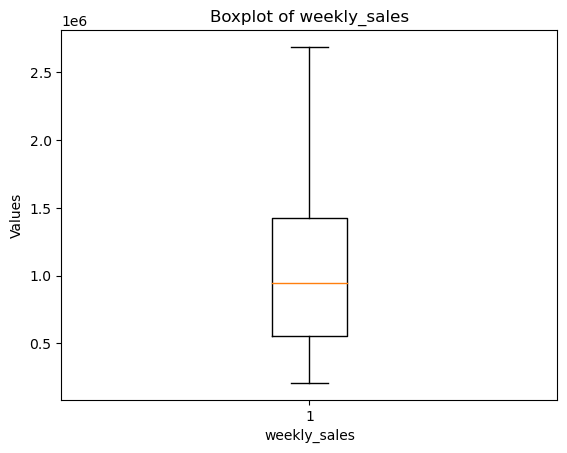

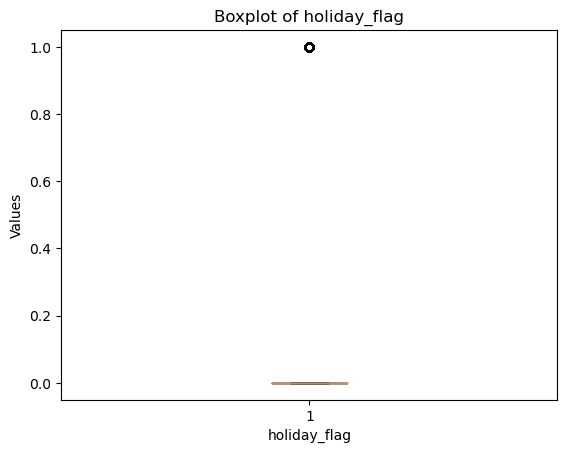

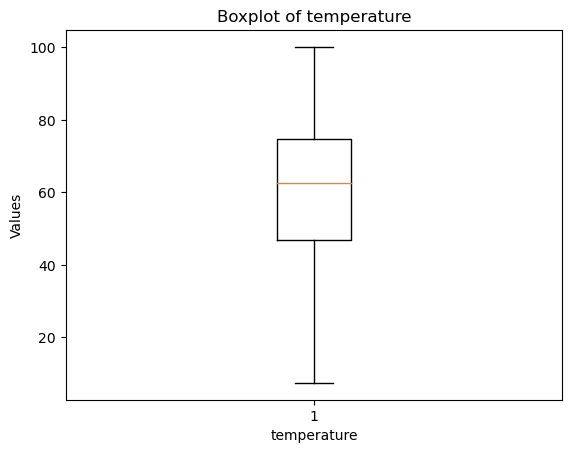

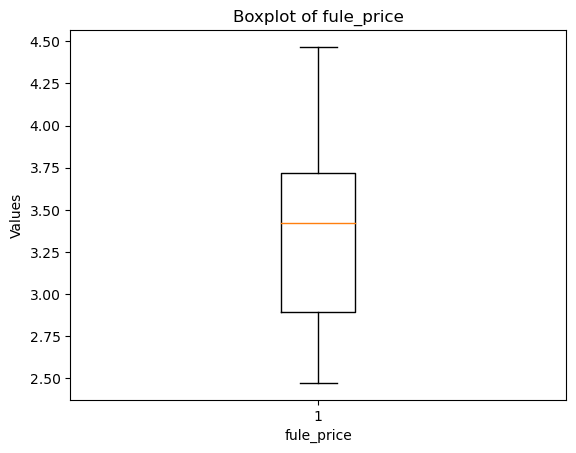

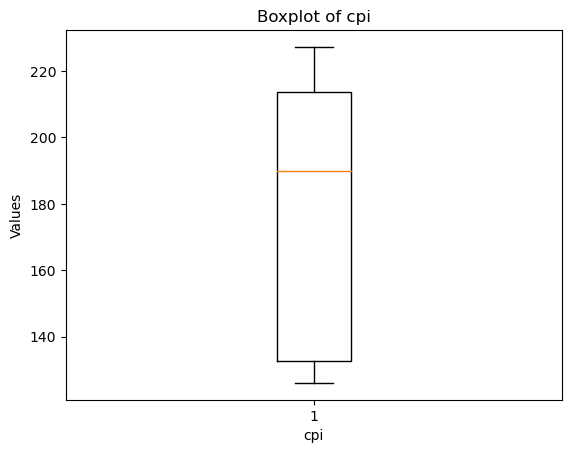

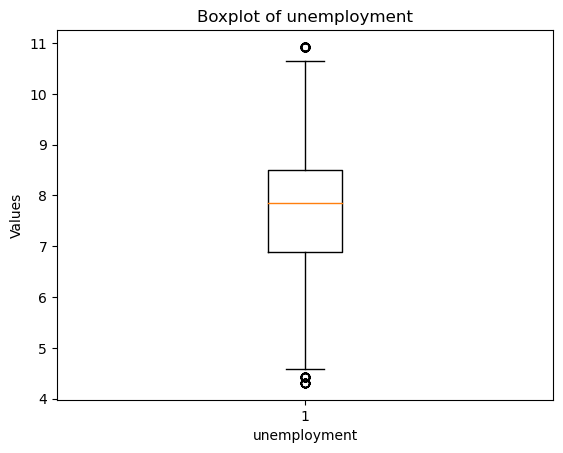

In [35]:
for i in col:
    if (data[i].dtype != 'object') and (i != 'Date'):
        plt.boxplot(data[i])
        plt.xlabel(i)  # Use 'i' directly as the label
        plt.ylabel('Values')
        plt.title(f'Boxplot of {i}')
        plt.show()

In [36]:
data

,store,Date,weekly_sales,holiday_flag,temperature,fule_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [37]:
# We have chosen to employ time series forecasting as a fundamental approach in our analysis. The rationale behind this choice
# is twofold. Firstly, time series forecasting provides us with a powerful tool for identifying and removing seasonal patterns
# and trends inherent in our data. By extracting and detrending the time series data, we can gain a clearer understanding of 
# its underlying patterns, enabling us to make more accurate forecasts. 

# Secondly, our objective is to forecast the future sales of the initial five stores in our dataset. This strategic focus 
# allows us to gain insights into the anticipated sales trends and patterns for these specific stores. By leveraging time 
# series forecasting, we aim to provide valuable insights into what the future sales trajectories may look like for these 
# select stores, aiding in informed decision-making and resource allocation.

In [38]:
data

,store,Date,weekly_sales,holiday_flag,temperature,fule_price,cpi,unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [39]:
# Now we will be preparing the dataset forfor 5 store and further we will be predicting and forecasting the 5 store

# Data prepration for top 5 store

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         5917 non-null   int64         
 1   Date          5917 non-null   datetime64[ns]
 2   weekly_sales  5917 non-null   float64       
 3   holiday_flag  5917 non-null   int64         
 4   temperature   5917 non-null   float64       
 5   fule_price    5917 non-null   float64       
 6   cpi           5917 non-null   float64       
 7   unemployment  5917 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 416.0 KB


In [41]:
# In this code, we are arranging the values in ascending order based on the 'date' column. This sorting allows us to gain a better understanding of when specific weekly sales and other related features were recorded, helping us establish a chronological context.

In [42]:
data = data.sort_values('Date',ascending = True).reset_index()
data

,index,store,Date,weekly_sales,holiday_flag,temperature,fule_price,cpi,unemployment
0,4324,31,2010-01-10,1213981.64,0,70.28,2.603,211.329874,8.163
1,1321,10,2010-01-10,1645892.97,0,86.01,3.001,126.234600,9.003
2,320,3,2010-01-10,358784.10,0,73.60,2.603,214.984655,7.564
3,5182,37,2010-01-10,529877.93,0,74.66,2.603,210.440443,8.476
4,749,6,2010-01-10,1328468.89,0,70.69,2.603,213.190713,7.007
...,...,...,...,...,...,...,...,...,...
5912,998,7,2012-12-10,503463.93,0,41.43,3.760,199.053937,7.557
5913,3429,24,2012-12-10,1416301.17,0,51.64,4.186,138.911700,8.693
5914,855,6,2012-12-10,1459396.84,0,65.43,3.601,225.005473,5.329
5915,4573,32,2012-12-10,1176681.31,0,43.49,3.760,199.053937,7.557


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         5917 non-null   int64         
 1   store         5917 non-null   int64         
 2   Date          5917 non-null   datetime64[ns]
 3   weekly_sales  5917 non-null   float64       
 4   holiday_flag  5917 non-null   int64         
 5   temperature   5917 non-null   float64       
 6   fule_price    5917 non-null   float64       
 7   cpi           5917 non-null   float64       
 8   unemployment  5917 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 416.2 KB


In [44]:
# # In this step, we are replacing the numerical index columns with the 'date' column, which contains date values. This modification is essential because we plan to conduct forecasting later on, and we require the 'date' column to serve as our index for this purpose.

In [45]:
data.index = data['Date']

In [46]:
# We have successfully set the 'date' column as the index, and there is an additional 'date' column left over. We are removing this redundant 'date' column

In [47]:
data.drop(['Date','index'],axis = 1,inplace = True)

In [48]:
# in this we will be preparing the dataset that is required to forecast the weeklys sales of 5 stores

# in this we are storing only the 'weekly_sales' within the one_store
# and we are doing rest for the same

In [49]:
one_store = data[['weekly_sales']][data['store']==1]
one_store

,weekly_sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
...,...
2012-10-08,1592409.97
2012-10-19,1508068.77
2012-10-26,1493659.74


In [50]:
one_store.head(10)

,weekly_sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-09,1540163.53
2010-03-12,1548033.78
2010-03-19,1472515.79
2010-03-26,1404429.92


In [51]:
two_store = data[['weekly_sales']][data['store']==2]
two_store

,weekly_sales
Date,
2010-01-10,1827440.43
2010-02-04,2066187.72
2010-02-07,2003940.64
2010-02-19,2124451.54
2010-02-26,1865097.27
...,...
2012-10-08,1866719.96
2012-10-19,1847990.41
2012-10-26,1834458.35


In [52]:
three_store = data[['weekly_sales']][data['store']==3]
three_store

,weekly_sales
Date,
2010-01-10,358784.10
2010-02-04,423294.40
2010-02-07,381151.72
2010-02-19,421642.19
2010-02-26,407204.86
...,...
2012-10-08,391811.60
2012-10-19,424513.08
2012-10-26,405432.70


In [53]:
four_store = data[['weekly_sales']][data['store']==4]
four_store

,weekly_sales
Date,
2010-01-10,1842821.02
2010-02-04,1979247.12
2010-02-07,1881337.21
2010-02-19,2049860.26
2010-02-26,1925728.84
...,...
2012-06-29,2128362.92
2012-08-06,2245257.18
2012-09-03,2202450.81


In [54]:
five_store = data[['weekly_sales']][data['store']==5]
five_store

,weekly_sales
Date,
2010-01-10,283178.12
2010-02-04,331406.00
2010-02-07,305993.27
2010-02-19,303447.57
2010-02-26,270281.63
...,...
2012-10-08,306759.70
2012-10-19,313358.15
2012-10-26,319550.77


In [55]:
# Standardisation

In [56]:
# The reason behind this action is that in time series forecasting, it's essential for the frequency of the date index in the store dataset to be in the format of 'weeks,' 'months,' or 'years.' However, the existing data doesn't adhere to regular intervals, a requirement for effective forecasting. Consequently, we are standardizing the data to ensure it follows a consistent pattern, enabling us to conduct accurate forecasting

In [57]:
# here we are importing the standard scaler

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
# In this step, we are standardizing the data for 'one_store' and storing it as 'scaled1.' Subsequently, we are creating a DataFrame from this standardized data. We will repeat this process for the remaining stores as well.

In [61]:
scaled1 = scaler.fit_transform(one_store)
scaled1 = pd.DataFrame(scaled1)
scaled1

,0
0,-0.655806
1,0.255438
2,-0.404327
3,0.364808
4,-0.936323
...,...
138,0.238979
139,-0.303637
140,-0.396339
141,0.359197


In [62]:
scaled2 = scaler.fit_transform(two_store)
scaled2 = pd.DataFrame(scaled2)
scaled2

,0
0,-0.465481
1,0.952208
2,0.582583
3,1.298180
4,-0.241874
...,...
136,-0.232238
137,-0.343455
138,-0.423808
139,0.069420


In [63]:
scaled3 = scaler.fit_transform(three_store)
scaled3 = pd.DataFrame(scaled3)
scaled3

,0
0,-0.951534
1,0.446082
2,-0.466940
3,0.410286
4,0.097502
...,...
138,-0.235993
139,0.472484
140,0.059108
141,0.634371


In [64]:
scaled4 = scaler.fit_transform(four_store)
scaled4 = pd.DataFrame(scaled4)
scaled4

,0
0,-1.272083
1,-0.386278
2,-1.022000
3,0.072208
4,-0.733769
...,...
115,0.581920
116,1.340906
117,1.062968
118,2.181114


In [65]:
scaled5 = scaler.fit_transform(five_store)
scaled5 = pd.DataFrame(scaled5)
scaled5

,0
0,-0.926285
1,0.356174
2,-0.319593
3,-0.387287
4,-1.269224
...,...
138,-0.299212
139,-0.123749
140,0.040923
141,0.421709


In [66]:
# in this we are ploting all the 5 stores to see if there are trend or seasonality

<Axes: title={'center': 'five_store'}>

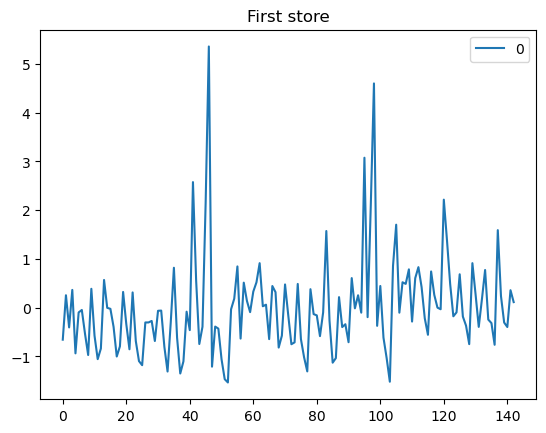

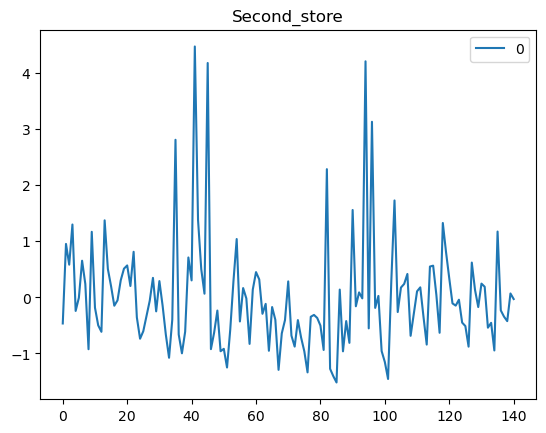

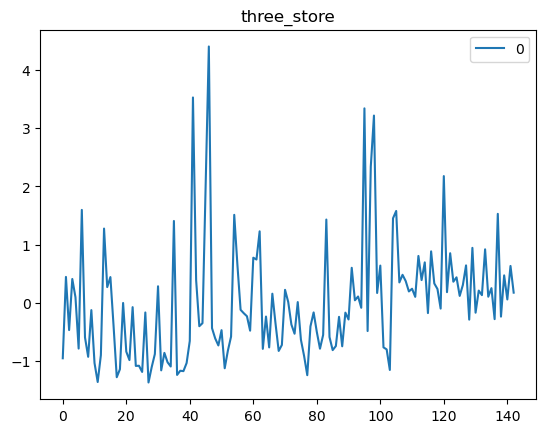

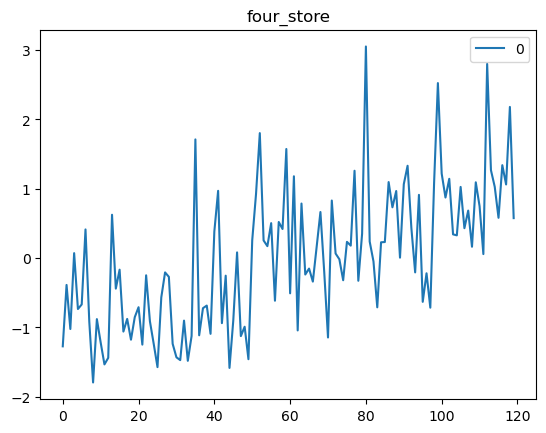

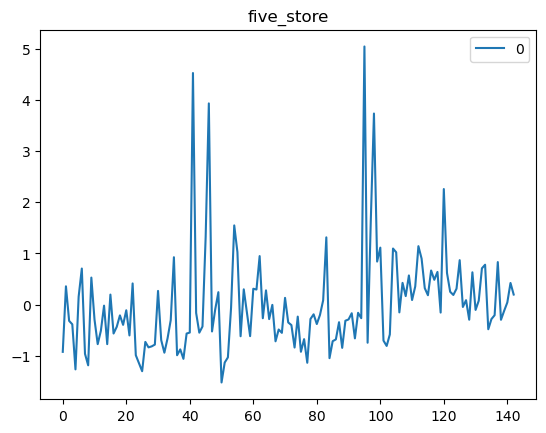

In [67]:
scaled1.plot(title = 'First store')
scaled2.plot(title = 'Second_store')
scaled3.plot(title = 'three_store')
scaled4.plot(title = 'four_store')
scaled5.plot(title = 'five_store')

In [68]:
# now we will be calculating all the store dataset p-val

# pval of 5 store

In [69]:
# Currently, our p-value stands above the threshold of 0.05. In the upcoming code, we will address this by eliminating the seasonality from the data. After the seasonality removal process, we will re-evaluate the p-value to determine if it has decreased below the 0.05 threshold

In [70]:
from statsmodels.tsa.stattools import adfuller
result_one = adfuller(scaled1)
result_one[1]

1.9818882304155039e-16

In [71]:
result_two = adfuller(scaled2)
result_two[1]

1.9567891838187496e-05

In [72]:
result_three = adfuller(scaled3)
result_three[1]

7.219753620366164e-16

In [73]:
# Now, at this stage, the p-value remains above the 0.05 threshold. In the subsequent code, we will proceed to eliminate the seasonality from the data. Following this adjustment, we will once again assess the p-value to determine if it has reduced to a level below 0.05

In [74]:
result_four = adfuller(scaled4)
result_four[1]

0.8994914798353311

In [75]:
result_five = adfuller(scaled5)
result_five[1]

1.627457837725422e-17

In [76]:
# only result_four have pval above 0.05 , so we are gonna detrended it

In [77]:
# Detrending data using a rolling mean (also known as a moving average) is a common technique in time series analysis and 
# data preprocessing. The primary purpose of detrending data in this way is to remove or reduce the effects of long-term 
# trends or seasonality in the data, making it easier to identify and analyze other patterns, such as short-term fluctuations
# or irregularities.

# So, after executing this line of code, rolling_mean will be a new pandas Series or DataFrame 
# (depending on whether four_store is a Series or DataFrame) that contains the rolling mean values for your time series 
# data. These rolling means represent the smoothed values of your data, where each data point is replaced by the mean value 
# of itself and the 11 preceding data points.

# This can be useful for various purposes, such as visualizing trends more clearly or preparing the data for further analysis
# or modeling while reducing the impact of short-term fluctuations.

In [78]:
rolling_mean4 = scaled4.rolling(window = 12).mean()

In [79]:
# The code four_rolling_mean_detrended = four_store - rolling_mean is used to detrend a time series data stored in the four_store variable by subtracting the rolling mean you previously calculated (rolling_mean) from the original data. This is a common technique in time series analysis and data preprocessing to remove long-term trends and seasonality, leaving behind the short-term fluctuations or irregularities.

In [80]:
rolling_mean4_detrend = scaled4 - rolling_mean4

In [81]:
rolling_mean4_detrend

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
115,-0.269931
116,0.404714
117,0.123809
118,1.096211


In [82]:
# using Matplotlib to create a side-by-side comparison of your original time series data (four_store) and the detrended data (four_rolling_mean_detrended) using subplots

# import matplotlib.pyplot as plt: This line imports the Matplotlib library, which is used for creating plots and visualizations in Python.

# ax1 = plt.subplot(1, 2, 1) and ax2 = plt.subplot(1, 2, 2): These lines create two subplots side by side in a single row and two columns. ax1 and ax2 are the axes objects associated with the first and second subplots, respectively.

# four_store.plot(title='Original Data', ax=ax1, figsize=(10, 5)): This line plots the original data (four_store) in the first subplot (ax1). It also sets the title of the first subplot to 'Original Data' and specifies the figure size.

# four_rolling_mean_detrended.plot(title='Detrended Data', ax=ax2, figsize=(10, 5)): This line plots the detrended data (four_rolling_mean_detrended) in the second subplot (ax2). It sets the title of the second subplot to 'Detrended Data' and specifies the figure size.

# plt.show(): This line displays the plots. After running this code, you will see two side-by-side subplots: one showing the original data and the other showing the detrended data, allowing you to visually compare them.

<Axes: title={'center': 'Detrended data'}>

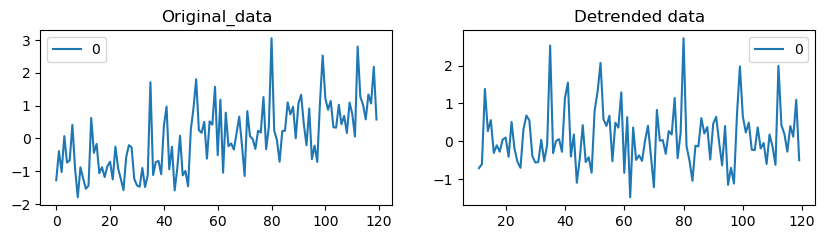

In [83]:
ax1 = plt.subplot(2,2,1)
scaled4.plot(title = 'Original_data',ax = ax1,figsize = (10,5))

ax2 = plt.subplot(2,2,2)
rolling_mean4_detrend.plot(title = 'Detrended data',ax = ax2,figsize = (10,5))

In [84]:
# The code four_rolling_mean_detrended_diff = four_rolling_mean_detrended - four_rolling_mean_detrended.shift() computes the difference between consecutive values of the detrended data four_rolling_mean_detrended.

# Studying the rate of change in the time series.
# Identifying patterns in short-term fluctuations.
# Preparing data for further analysis, such as time series forecasting or modeling.
# Assessing the stationarity of the time series (stationary time series have constant statistical properties over time).
# You can use four_rolling_mean_detrended_diff for further analysis or visualization to explore the behavior of your detrended time series at a finer level of detail compared to the original detrended data.

In [85]:
rolling_mean4_detrend_diff = rolling_mean4_detrend - rolling_mean4_detrend.shift()

In [86]:
rolling_mean4_detrend_diff

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
115,-0.467497
116,0.674645
117,-0.280905
118,0.972402


In [87]:
# The provided code creates a side-by-side comparison of two plots using Matplotlib. It plots the original detrended data (four_rolling_mean_detrended) in the first subplot and the discrete differences of the detrended data (four_rolling_mean_detrended_diff) in the second subplot. 

<Axes: title={'center': 'Detrended data'}>

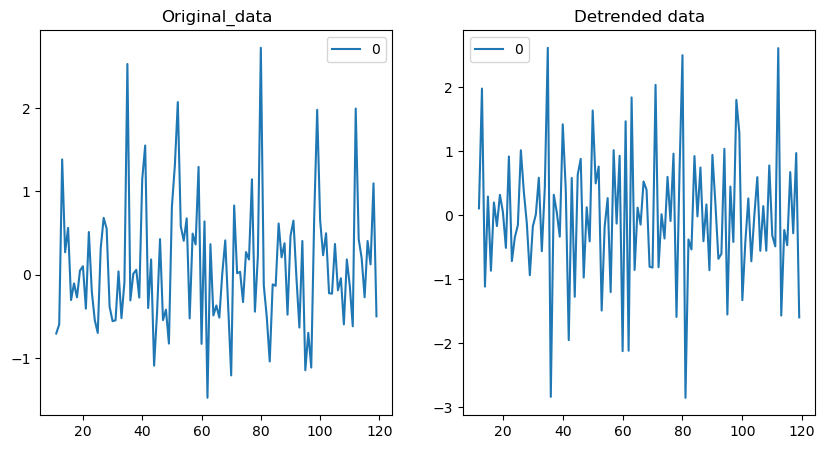

In [88]:
ax1 = plt.subplot(1,2,1)
rolling_mean4_detrend.plot(title = 'Original_data',ax = ax1,figsize = (10,5))

ax2 = plt.subplot(1,2,2)
rolling_mean4_detrend_diff.plot(title = 'Detrended data',ax = ax2,figsize = (10,5))

In [89]:
# in this code we are removing the null values, and this is important because
# after this code we will be calculating the p-val and without removing the null values we cannot check the p-values

In [90]:
rolling_mean4_detrend_diff = rolling_mean4_detrend_diff.dropna()

In [91]:
result_four = adfuller(rolling_mean4_detrend_diff)
result_four

(-5.659341311552273,
 9.458728029634086e-07,
 11,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 246.6154814164617)

In [92]:
# now we will be installing the pmdarima from the pmdarima we will be import liberies of auto_arima so we can know which model to use before forecasting

In [93]:
!pip install pmdarima

In [94]:
from pmdarima import auto_arima

In [95]:
# The code you've provided appears to be using the auto_arima function from the pmdarima (Pyramid ARIMA) library to automatically determine the order of an ARIMA (AutoRegressive Integrated Moving Average) model for time series forecasting

# auto_arima(one_scaled): This function call performs automatic model selection and order determination for an ARIMA model on the standardized time series data in one_scaled.

# one_scaled is assumed to be a pandas DataFrame or Series containing the time series data.
# auto_arima uses a stepwise search algorithm to identify the best combination of p, d, and q parameters for the ARIMA model. These parameters represent the order of autoregressive (AR), differencing (I), and moving average (MA) components of the model, respectively.

# .summary(): This method is called on the one_order object to display a summary of the selected ARIMA model's parameters and performance metrics.

In [96]:
one_order = auto_arima(scaled1)
one_order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -199.791
Date:                Fri, 08 Sep 2023   AIC                            405.582
Time:                        03:53:01   BIC                            414.449
Sample:                             0   HQIC                           409.185
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7512      0.055    -13.726      0.000      -0.858      -0.644
ma.L2         -0.2104      0.067     -3.123      0.002      -0.342      -0.078
sigma2         0.9597      0.066     14.602      0.000       0.831       1.088
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               314.76
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             1.89
Prob(H) (two-sided):                  0.50   Kurtosis:                         9.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
# we are doing rest for the same

In [98]:
two_order = auto_arima(scaled2)
two_order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  141
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -193.327
Date:                Fri, 08 Sep 2023   AIC                            396.654
Time:                        03:53:04   BIC                            411.397
Sample:                             0   HQIC                           402.645
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2521      0.136     -9.226      0.000      -1.518      -0.986
ar.L2         -0.5579      0.163     -3.418      0.001      -0.878      -0.238
ma.L1          1.4103      0.107     13.227      0.000       1.201       1.619
ma.L2          0.8121      0.126      6.437      0.000       0.565       1.059
sigma2         0.9052      0.069     13.212      0.000       0.771       1.039
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               230.03
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.80
Prob(H) (two-sided):                  0.21   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
three_order = auto_arima(scaled3)
three_order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -197.696
Date:                Fri, 08 Sep 2023   AIC                            401.393
Time:                        03:53:07   BIC                            410.260
Sample:                             0   HQIC                           404.996
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1552      0.087      1.791      0.073      -0.015       0.325
ma.L1         -0.9461      0.038    -25.088      0.000      -1.020      -0.872
sigma2         0.9350      0.065     14.476      0.000       0.808       1.062
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               225.61
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             1.95
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
rolling_mean4_detrend_diff_order = auto_arima(rolling_mean4_detrend_diff)
rolling_mean4_detrend_diff_order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -132.776
Date:                Fri, 08 Sep 2023   AIC                            277.553
Time:                        03:53:08   BIC                            293.645
Sample:                             0   HQIC                           284.078
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7332      0.101     -7.266      0.000      -0.931      -0.535
ar.L2         -0.5481      0.146     -3.743      0.000      -0.835      -0.261
ar.L3         -0.5174      0.176     -2.943      0.003      -0.862      -0.173
ar.L4         -0.3861      0.174     -2.223      0.026      -0.726      -0.046
ar.L5         -0.2315      0.138     -1.682      0.092      -0.501       0.038
sigma2         0.6779      0.073      9.277      0.000       0.535       0.821
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.69
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             1.05
Prob(H) (two-sided):                  0.93   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
five_order = auto_arima(scaled5)
five_order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -200.432
Date:                Fri, 08 Sep 2023   AIC                            404.865
Time:                        03:53:10   BIC                            410.777
Sample:                             0   HQIC                           407.267
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9165      0.031    -29.566      0.000      -0.977      -0.856
sigma2         0.9726      0.044     22.006      0.000       0.886       1.059
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):               955.62
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             2.84
Prob(H) (two-sided):                  0.04   Kurtosis:                        14.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
# now we will be creating training and testing and we will be puting the training amount the the model use to train itself and after that we will be testing the data and with ath we will be forecasting 

# training the models

In [103]:
# The provided code is used to split your standardized time series data (one_scaled) into training and testing sets. This is a common practice in machine learning and time series analysis to evaluate the performance of forecasting or modeling techniques

#  you can train your forecasting model on historical data (the training set) and then assess its accuracy and performance by comparing its predictions to the actual values in the testing set. This helps you understand how well your model generalizes to unseen data and can be crucial for making reliable forecasts or predictions.

In [104]:
# we have done same for the rest of the store 

In [105]:
one_train = scaled1.iloc[:135]
one_test = scaled1.iloc[135:]

In [106]:
one_train

,0
0,-0.655806
1,0.255438
2,-0.404327
3,0.364808
4,-0.936323
...,...
130,0.274094
131,-0.393362
132,0.172542
133,0.773103


In [107]:
two_train = scaled2.iloc[:135]
two_test = scaled2.iloc[135:]

In [108]:
three_train = scaled3.iloc[:135]
three_test = scaled3.iloc[135:]

In [109]:
rolling_mean4_detrend_diff_train = rolling_mean4_detrend_diff.iloc[:100]
rolling_mean4_detrend_diff_test = rolling_mean4_detrend_diff.iloc[100:]

In [110]:
five_train = scaled5.iloc[:135]
five_test = scaled5.iloc[135:]

In [111]:
# now we will be implementing the training and testing and after that we will be creating the models and forecasting it later with the raing and testing dataset

In [112]:
# Implementing the model --- using SARIMAX

In [113]:
# now we will be importing SARIMAX that was mentions in the auto_arima 

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [115]:
# # This code calculates the first-order difference of the training data (one_train) using the .diff() method. Differencing is a common technique to make time series data more stationary.
# # The .dropna() method is used to remove any NaN values that may result from differencing.

# scaled1_model = SARIMAX(one_train, order=(0, 1, 2), seasonal_order=(0, 1, 2, 48), enforce_stationarity=False)
# scaled1_model = scaled1_model.fit()

# # This code initializes a SARIMAX model with the specified order and seasonal order. The order parameter represents the non-seasonal components (p, d, q), and the seasonal_order parameter represents the seasonal components (P, D, Q, s).
# # enforce_stationarity=False indicates that stationarity is not enforced, as you've already differenced the data.
# # The model is then fitted to the differenced training data using one_model.fit().

# scaled1['pred'] = scaled1_model.predict(start=len(one_train), end=len(one_train) + len(one_test) - 1)

# # This code generates predictions for the SARIMA model using the predict() method. It specifies the start and end points for prediction, which correspond to the length of the differenced training data and the testing set.
# # The predicted values are stored in a new column named 'pred' in the one_scaled DataFrame.

# scaled1.plot()
# plt.show()

# # This code plots the original standardized time series data along with the predicted values ('pred') using Matplotlib. This allows you to visualize the performance of the SARIMA model in relation to the actual data.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


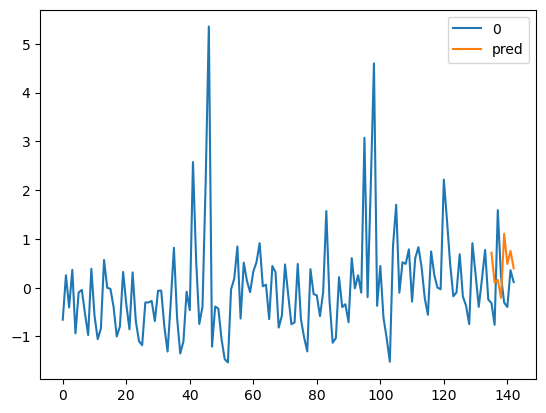

In [116]:
scaled1_model = SARIMAX(one_train, order=(0, 1, 2), seasonal_order=(0, 1, 2, 48), enforce_stationarity=False)
scaled1_model = scaled1_model.fit()

scaled1['pred'] = scaled1_model.predict(start=len(one_train), end=len(one_train) + len(one_test) - 1)

scaled1.plot()
plt.show()


In [117]:
# now we will doing the same for the rest of the stores

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


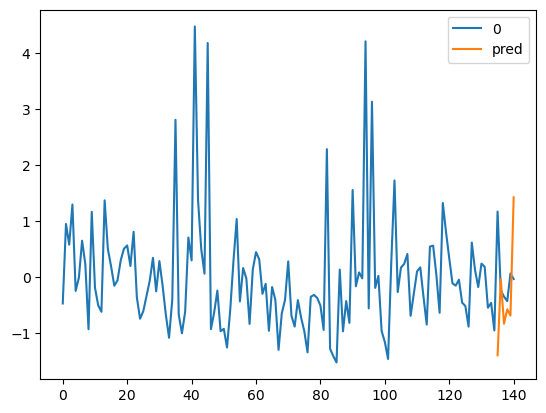

In [118]:
scaled2_model = SARIMAX(two_train, order=(2,0,2), seasonal_order=(0,1,2, 50), enforce_stationarity=False)
scaled2_model = scaled2_model.fit()

scaled2['pred'] = scaled2_model.predict(start=len(two_train), end=len(two_train) + len(two_test) - 1)

scaled2.plot()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


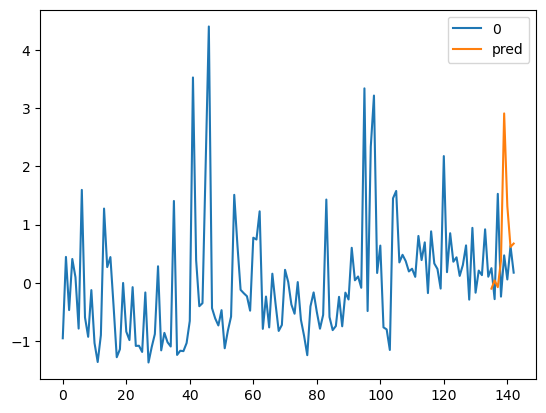

In [119]:
scaled3_model = SARIMAX(three_train, order=(1,1,1), seasonal_order=(1,1,1, 49), enforce_stationarity=False)
scaled3_model = scaled3_model.fit()

scaled3['pred'] = scaled3_model.predict(start=len(three_train), end=len(three_train) + len(three_test) - 1)

scaled3.plot()
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Valu

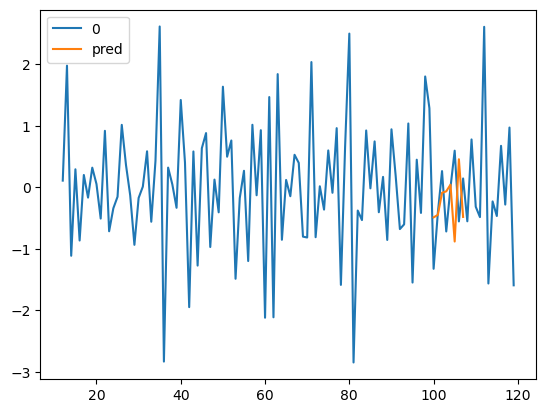

In [120]:
rolling_mean4_detrend_diff_model = SARIMAX(rolling_mean4_detrend_diff_train, order=(1,1,1), seasonal_order=(1,1,1, 48), enforce_stationarity=False)
rolling_mean4_detrend_diff_model = rolling_mean4_detrend_diff_model.fit()

rolling_mean4_detrend_diff['pred'] = rolling_mean4_detrend_diff_model.predict(start=len(rolling_mean4_detrend_diff_train), end=len(rolling_mean4_detrend_diff_train) + len(rolling_mean4_detrend_diff_test) - 1)

rolling_mean4_detrend_diff.plot()
plt.show()


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


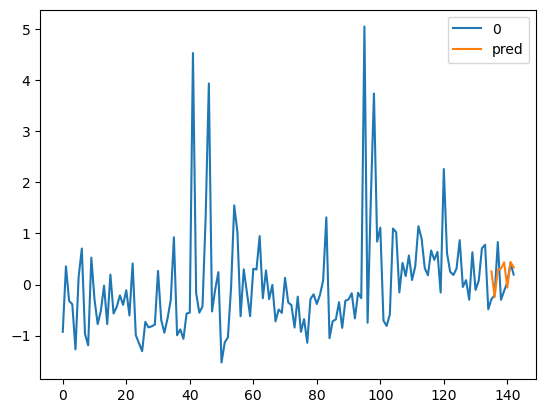

In [121]:
scaled5_model = SARIMAX(five_train, order=(0,1,1), seasonal_order=(2,1,2,48), enforce_stationarity=False)
scaled5_model = scaled5_model.fit()

scaled5['pred'] = scaled5_model.predict(start=len(five_train), end=len(five_train) + len(five_test) - 1)

scaled5.plot()
plt.show()


In [122]:
# now we will be forecasting the data upto 12 weeks which is 84 days

In [123]:
#Forecasting

In [124]:
one_store

,weekly_sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
...,...
2012-10-08,1592409.97
2012-10-19,1508068.77
2012-10-26,1493659.74


In [125]:
# # By running this code, you can visually compare the original data to the forecasted values. This allows you to assess how well your SARIMA model is capturing the patterns and trends in the data and how it performs in predicting future values.

# ou are using a trained SARIMAX model (scaled1_model) that you've previously fitted to historical data.

# You generate a forecast for future data points, specifically 84 time steps ahead. This forecast represents the model's prediction for future values based on the patterns it has learned from the historical data.

# You then create a plot that illustrates two sets of data:

# The actual historical data from the 'scaled1' DataFrame (specifically, column 0).
# The forecasted data generated by the SARIMAX model for the same time period.
# This plot allows you to visually compare the actual data with the model's predictions. It helps you assess how well the model is capturing the underlying patterns in the data and making forecasts for the future.

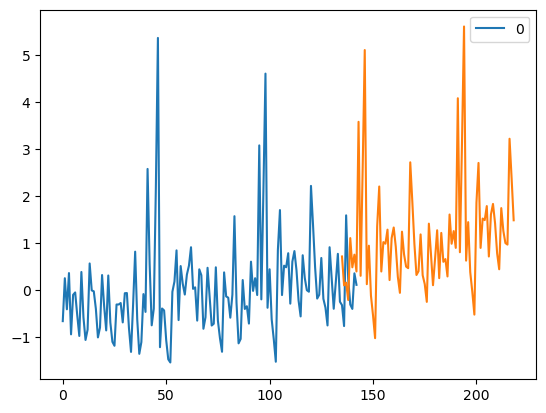

In [126]:
one_forecast = scaled1_model.forecast(steps = 84)
scaled1[[0]].plot()
one_forecast.plot()
plt.show()

In [127]:
# now we will be doing the same for the rest

In [128]:
two_store

,weekly_sales
Date,
2010-01-10,1827440.43
2010-02-04,2066187.72
2010-02-07,2003940.64
2010-02-19,2124451.54
2010-02-26,1865097.27
...,...
2012-10-08,1866719.96
2012-10-19,1847990.41
2012-10-26,1834458.35


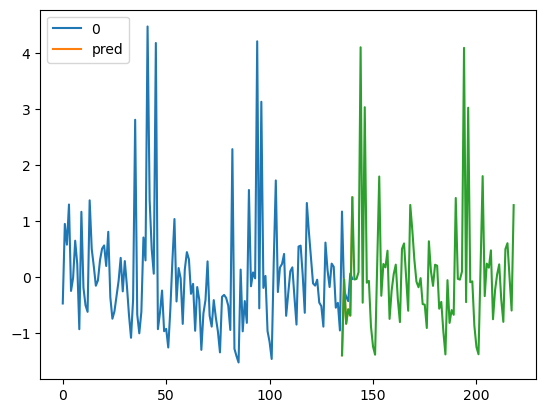

In [129]:
two_forecast = scaled2_model.forecast(steps = 84)
scaled2.plot()
two_forecast.plot()
plt.show()

In [130]:
three_store

,weekly_sales
Date,
2010-01-10,358784.10
2010-02-04,423294.40
2010-02-07,381151.72
2010-02-19,421642.19
2010-02-26,407204.86
...,...
2012-10-08,391811.60
2012-10-19,424513.08
2012-10-26,405432.70


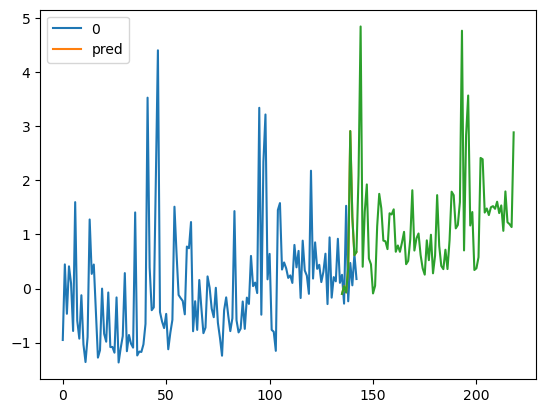

In [131]:
three_forecast = scaled3_model.forecast(steps = 84)
scaled3.plot()
three_forecast.plot()
plt.show()

In [132]:
rolling_mean4_detrend_diff

,0,pred
12,0.108590,NaN
13,1.979559,NaN
14,-1.113947,NaN
15,0.292963,NaN
16,-0.865773,NaN
...,...,...
115,-0.467497,NaN
116,0.674645,NaN
117,-0.280905,NaN
118,0.972402,NaN


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


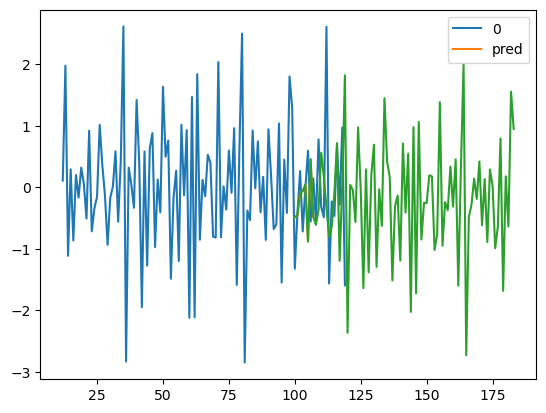

In [133]:
four_forecast = rolling_mean4_detrend_diff_model.forecast(steps = 84)
rolling_mean4_detrend_diff.plot()
four_forecast.plot()
plt.show()

In [134]:
five_store

,weekly_sales
Date,
2010-01-10,283178.12
2010-02-04,331406.00
2010-02-07,305993.27
2010-02-19,303447.57
2010-02-26,270281.63
...,...
2012-10-08,306759.70
2012-10-19,313358.15
2012-10-26,319550.77


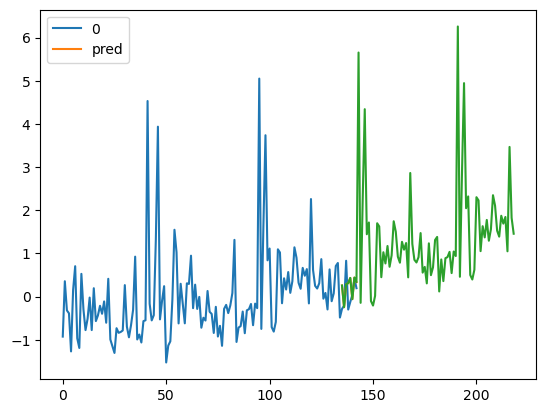

In [135]:
five_forecast = scaled5_model.forecast(steps = 84)
scaled5.plot()
five_forecast.plot()
plt.show()

# Problem Statement solving

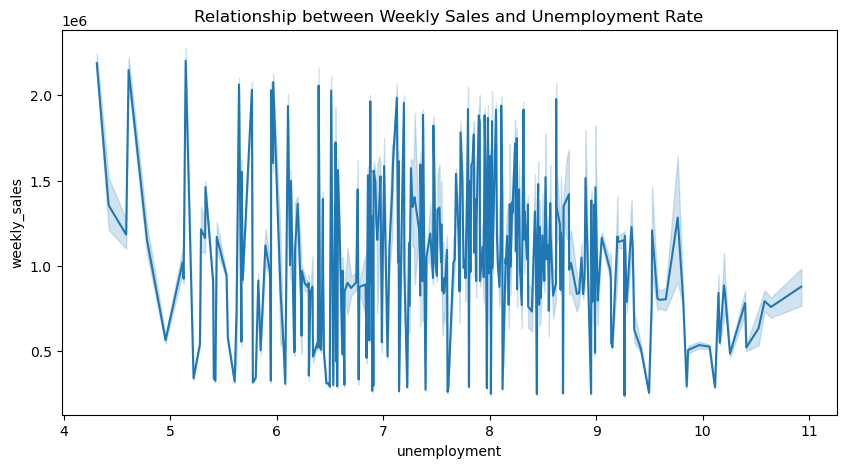

In [136]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

fig = plt.figure(figsize = (10,5))
sns.lineplot(data= data,x = 'unemployment',y = 'weekly_sales')
plt.title('Relationship between Weekly Sales and Unemployment Rate')
plt.show()

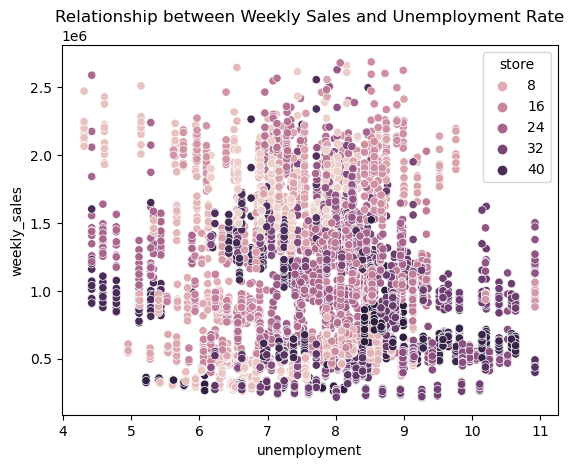

In [137]:
sns.scatterplot(data=data, x='unemployment', y='weekly_sales', hue='store')
plt.title('Relationship between Weekly Sales and Unemployment Rate')
plt.show()

In [138]:
unemp_rate_corr = data[['weekly_sales', 'unemployment']]
unemp_rate_corr = unemp_rate_corr.corr()
unemp_rate_corr

,weekly_sales,unemployment
weekly_sales,1.000000,-0.073092
unemployment,-0.073092,1.000000


<Axes: >

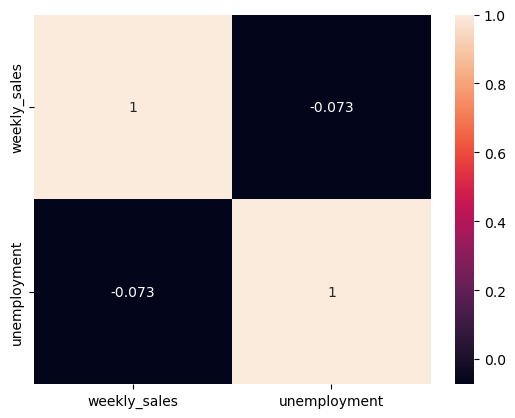

In [139]:
sns.heatmap(unemp_rate_corr,annot = True)

In [140]:
ws = data.groupby('store')['weekly_sales'].sum()
ws = pd.DataFrame(ws)
ws.sort_values('weekly_sales',ascending= True)

,weekly_sales
store,
38,7.347379e+06
12,1.638671e+07
28,2.110677e+07
33,3.716022e+07
44,4.329309e+07
5,4.547569e+07
36,5.341221e+07
3,5.758674e+07
30,6.271689e+07


In [141]:
# ans - the answere is 'yes'


# Yes, weekly sales are affected by the unemployment rate. The graph shows a negative correlation between the two variables, 
# meaning that as the unemployment rate increases, weekly sales decrease. This is because when more people are unemployed, 
# they have less money to spend, which leads to lower sales.

# The relationship between unemployment rate and weekly sales is not always perfectly negative. There are other factors that 
# can affect sales, such as the overall economy, the price of goods and services, and consumer confidence. However, the 
# unemployment rate is a major factor that businesses need to consider when forecasting sales.

# the top afftected 5 store are 38,12,28,33,44

<Axes: xlabel='Date', ylabel='weekly_sales'>

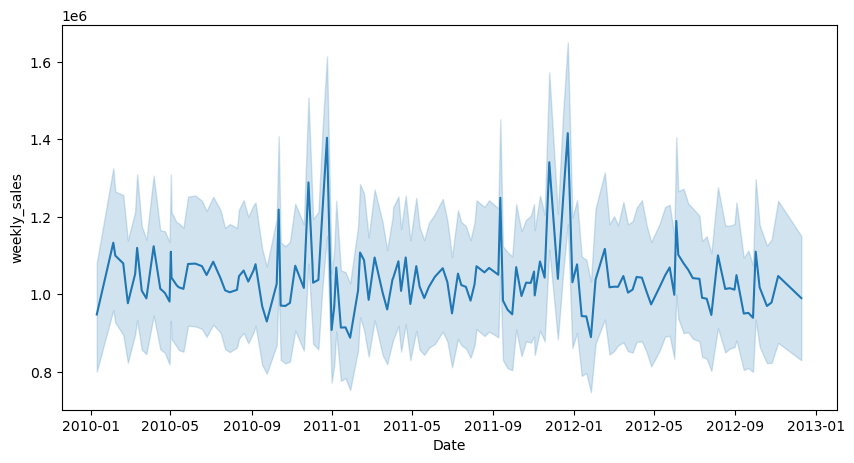

In [142]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?
plt.figure(figsize = (10,5))
sns.lineplot(data = data, x = 'Date', y = 'weekly_sales')

In [143]:
# "Indeed, there appears to be a recurring seasonal trend occurring from September 2011 to January 2012, and it repeats in the 
# following year as well. In my analysis, it seems that this pattern may be attributed to the holiday season. Starting in 
# September (09), the holiday season kicks off and continues until January 2012, encompassing the New Year festivities. This 
# holiday season likely explains the significant spike in sales observed during this period."

# The peak sales are in the fourth quarter of the year, which is typically the holiday season. This is likely due to people 
# shopping for gifts and other items during the holidays. The lowest sales are in the first quarter of the year, which is 
# typically a slow season for retail sales.

# 1.The highest weekly sales are in December, followed by November and October.
# 2.The lowest weekly sales are in January, followed by February and March.
# 3.There is a gradual increase in sales from January to June, followed by a gradual decrease from July to December.

# Reasons 

# 1.The holiday season: People tend to shop more during the holiday season, as they are buying gifts for family and friends.

# 2.The weather: People tend to shop less during the winter months, as they are less likely to go out shopping in cold weather.

# 3.School schedules: People tend to shop less during the summer months, as they are more likely to be on vacation or spending 
# time with their families.

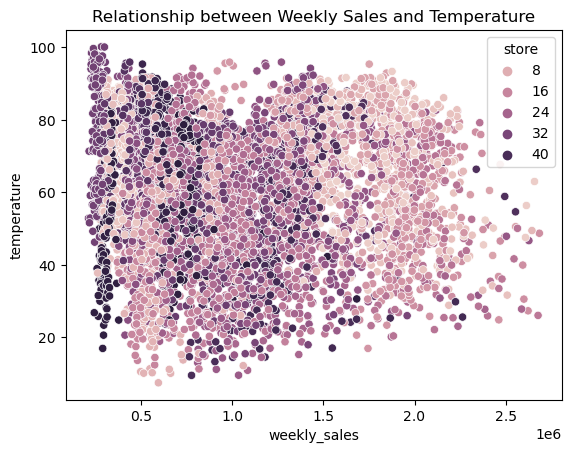

In [144]:
# c. Does temperature affect the weekly sales in any manner?

sns.scatterplot(data=data, x='weekly_sales', y='temperature', hue='store')
plt.title('Relationship between Weekly Sales and Temperature')
plt.show()

In [145]:
# ans - it does not appear that temperature has a significant impact on weekly sales.The graph shows a scatter plot of weekly 
# sales vs. temperature, with no clear trend or correlation between the two variables. This suggests that there is no strong 
# relationship between temperature and weekly sales.

# There are a few possible explanations for this. First, the temperature may not be a significant factor in the decision-making
# process for most consumers. Other factors, such as price, product availability, and advertising, may be more important. 
# Second, the range of temperatures in the data set may not be large enough to capture any potential correlation. 
# For example, if all of the temperatures were within a few degrees of each other, it would be difficult to see any 
# relationship between temperature and sales.

# Of course, it is also possible that there is a relationship between temperature and weekly sales, but it is not being
# captured by this particular data set. For example, the data set may not be large enough or representative enough to
# detect a small or weak correlation.

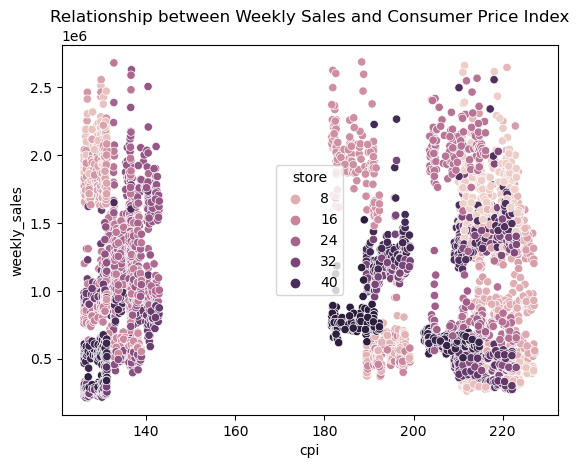

In [146]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?
sns.scatterplot(data=data, x='cpi', y='weekly_sales', hue='store')
plt.title('Relationship between Weekly Sales and Consumer Price Index')
plt.show()

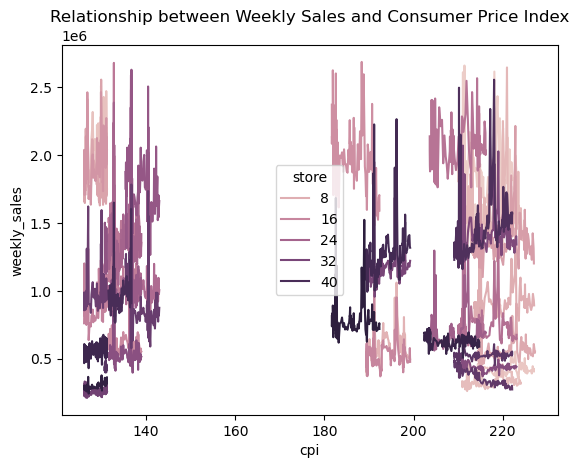

In [147]:
sns.lineplot(data=data, x='cpi', y='weekly_sales', hue='store')
plt.title('Relationship between Weekly Sales and Consumer Price Index')
plt.show()

In [148]:
cpi_ws_corr = data[['weekly_sales','cpi']]
cpi_ws_corr= cpi_ws_corr.corr()
cpi_ws_corr

,weekly_sales,cpi
weekly_sales,1.000000,-0.082977
cpi,-0.082977,1.000000


<Axes: >

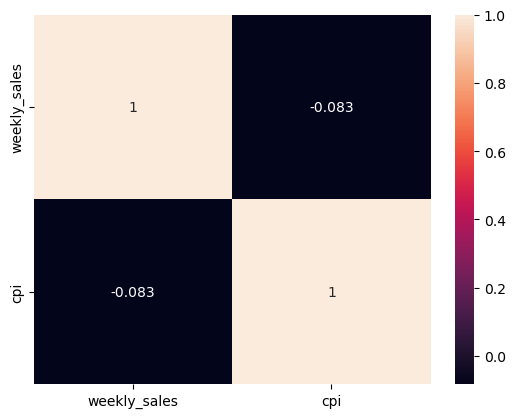

In [149]:
sns.heatmap(cpi_ws_corr, annot =True)

In [150]:
# "We can observe that the weekly sales of the stores generally decrease as the CPI increases. This trend is likely attributed
# to the fact that consumers have less money to spend when the prices of goods and services rise. However, it is important to
# note that the impact of the CPI on weekly sales can vary depending on the type of store and the mix of goods and services
# offered.

# For instance, the weekly sales of grocery stores may be less affected by the CPI compared to the weekly sales of clothing
# stores. This is because grocery stores sell essential goods that consumers need to purchase regardless of the price. On
# the other hand, clothing stores sell discretionary goods, and consumers may choose to purchase less when prices are rising."

# "The correlation coefficient reveals a slight negative correlation (-0.083). We can assume that this suggests a potential
# impact on the livelihood of individuals in the lower income bracket due to the rise in the prices of goods and services.
# However, the high-income level group does not show a decreasing trend. This implies that individuals with higher income 
# levels tend to continue purchasing their necessary goods and services.

# It's essential to note that the data we currently have only indicates a relatively weak correlation coefficient between
# weekly sales and CPI."

In [151]:
# e. Top performing stores according to the historical data.

top_stores = data.groupby('store')['weekly_sales'].sum().sort_values(ascending=False)
top_stores = pd.DataFrame(top_stores)
top_stores.head()

,weekly_sales
store,
20,2.800237e+08
14,2.761276e+08
2,2.687221e+08
13,2.682025e+08
10,2.556789e+08


In [152]:
# ans - the top 5 performing stores are 
# stores = 20,14,2,13,10

In [153]:
# f. The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.

lowest_store = top_stores.idxmin()
difference = top_stores.max() - top_stores.min()

print(f'Lowest Performing Store: {lowest_store}')
print(f'Difference between Highest and Lowest Sales: {difference}')

Lowest Performing Store: weekly_sales    38
dtype: int64
Difference between Highest and Lowest Sales: weekly_sales    2.726764e+08
dtype: float64


In [154]:
# ans - the lowest performing store is 38
# the difference between the highest and lowest sales are- 2.726764e+08